In [1]:
import os
os.listdir()

['train.csv',
 'DataCleaning.ipynb',
 'EDA.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'LSTM.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [3]:
df = pd.read_csv('train_FeatureSelected.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(122775, 16)


,MLPAP_TI-0706B10,MLPAP_TI-0706B15,MLPAP_TI-0706B21,MLPAP_TI-0716A03,MLPAP_TI-0716A05,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TI-0706B01,MLPAP_TRC-0610.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_FR-0755.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
2016-05-10 08:10:00,-0.883078,0.436520,0.527857,2.885848,0.448321,0.677295,0.881300,0.796872,0.633992,3.036852,3.099501,0.608934,-2.619894,-1.015438,-0.088287,0.914125
2016-05-10 08:20:00,-0.883078,0.436520,0.527857,2.885848,0.448321,0.677122,0.881648,0.797089,0.633992,2.864041,3.272350,0.447358,-2.614712,-0.982340,-0.088287,0.919765
2016-05-10 08:30:00,-0.883078,0.436830,0.527857,2.885848,0.448321,0.677619,0.881571,0.796987,0.633992,3.006620,3.596289,-0.634915,-2.617016,-0.975999,-0.088287,0.926346
2016-05-10 23:40:00,-1.508446,0.411821,0.395807,2.856863,0.468480,0.641630,0.853312,0.763786,0.601863,1.710665,3.361869,0.769126,-2.612469,-0.840360,-0.088287,0.906781
2016-05-10 23:50:00,-1.443246,0.412131,0.395807,2.882331,0.468480,0.642077,0.853810,0.764300,0.603356,1.822449,3.029603,0.528846,-2.620588,-0.868595,-0.088287,0.926688


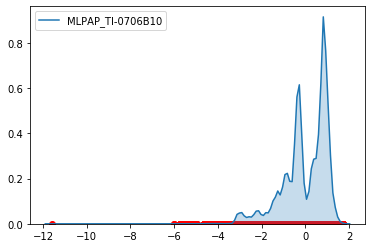

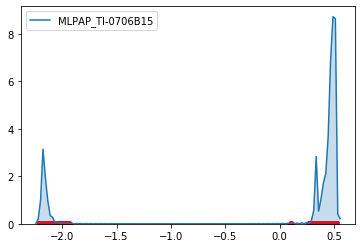

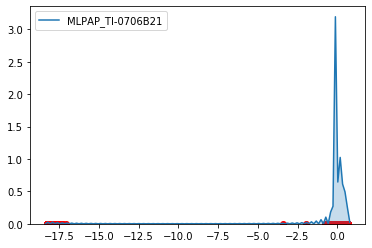

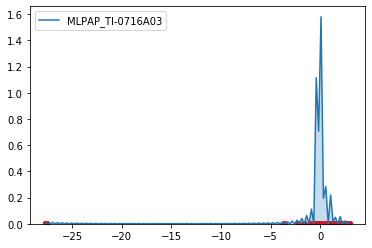

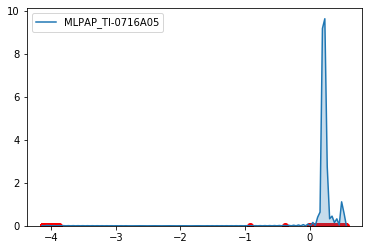

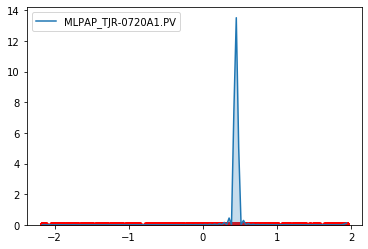

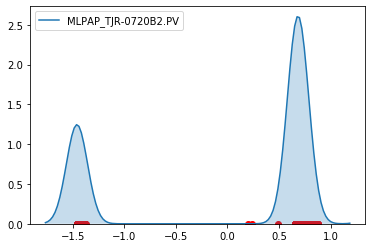

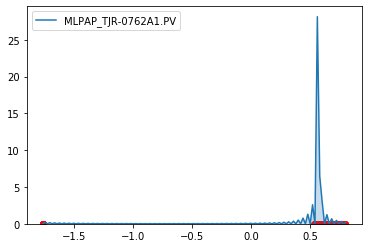

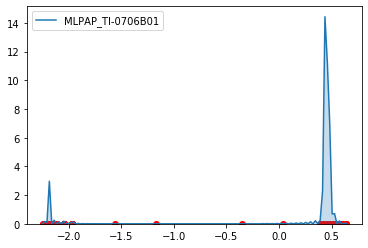

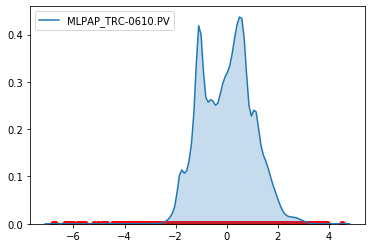

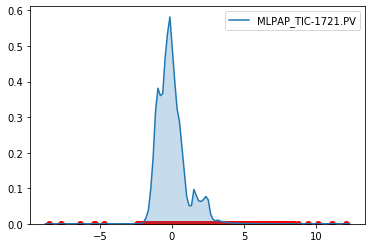

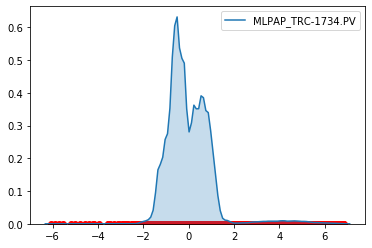

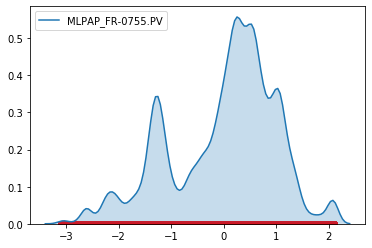

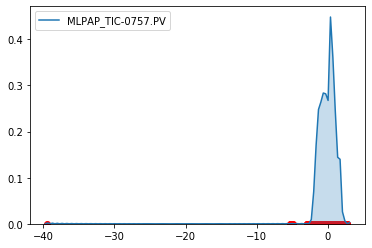

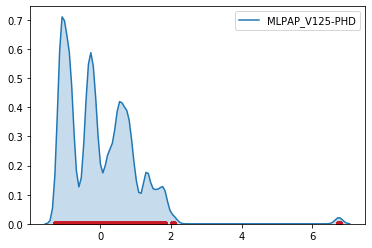

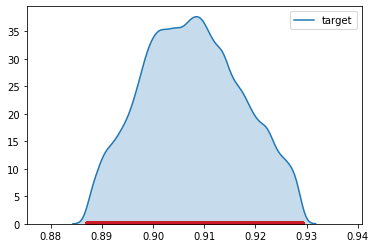

In [4]:
for i in df.columns:
    plt.scatter(df[i],[0]*len(df),color='red')
    sns.kdeplot(df[i],shade=True)
    plt.show()

/workspace/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


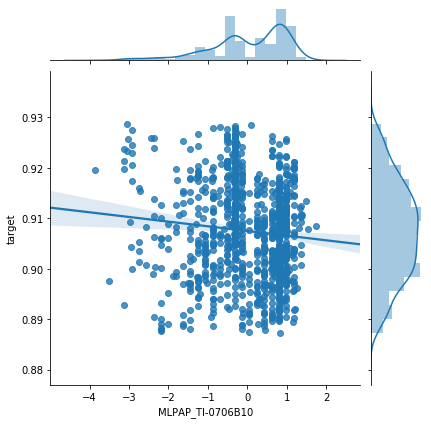

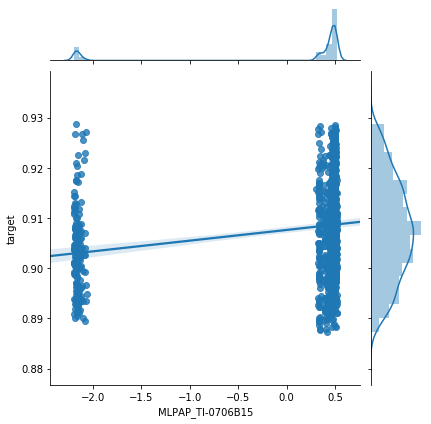

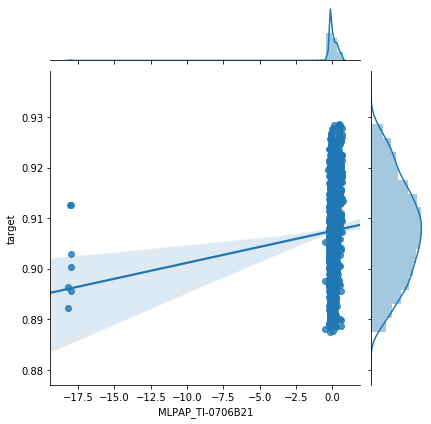

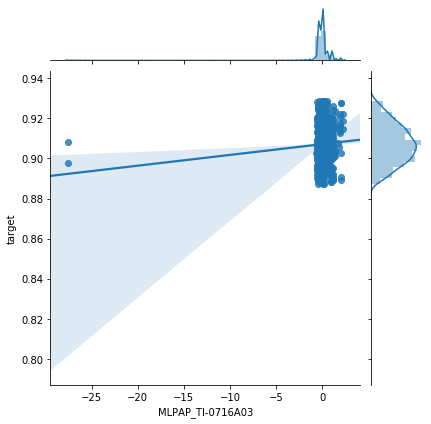

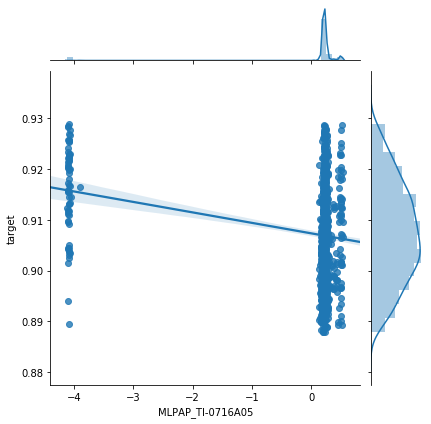

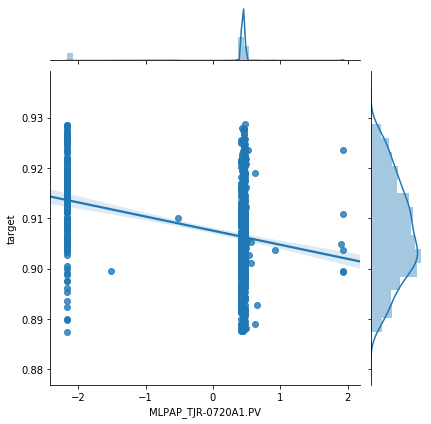

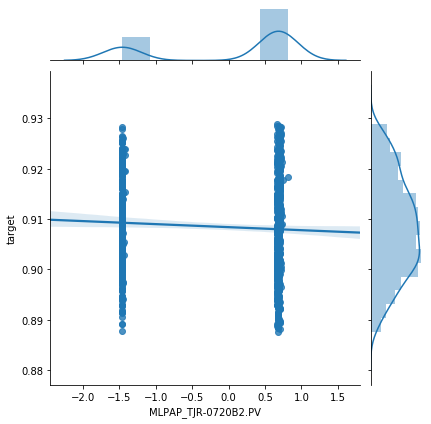

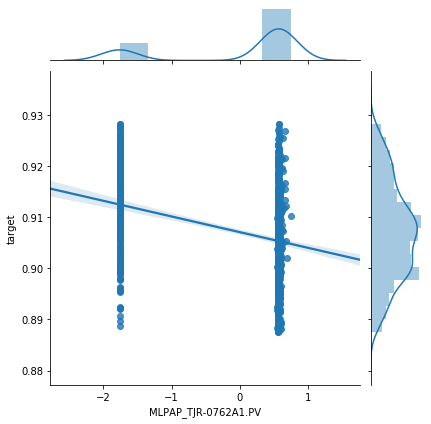

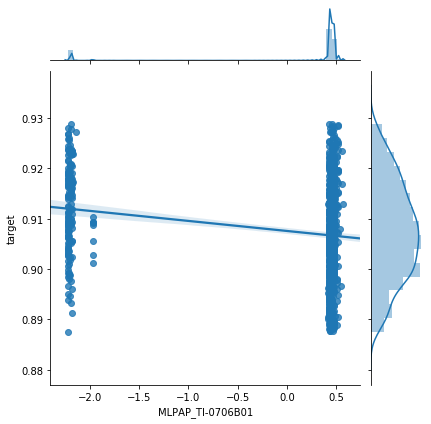

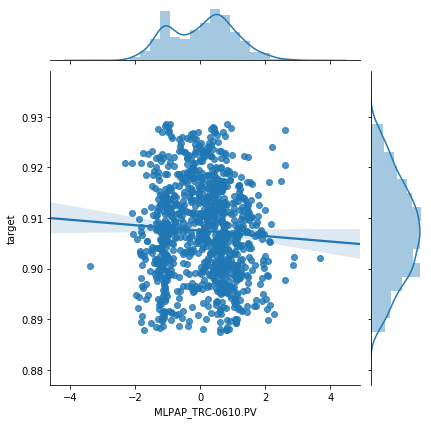

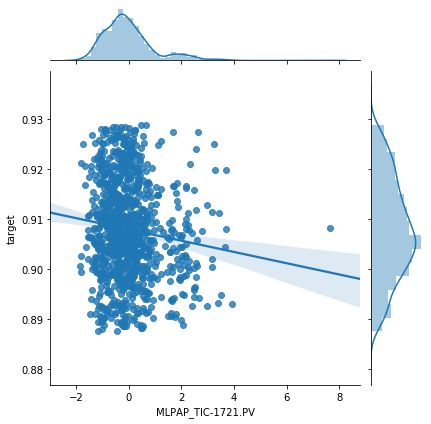

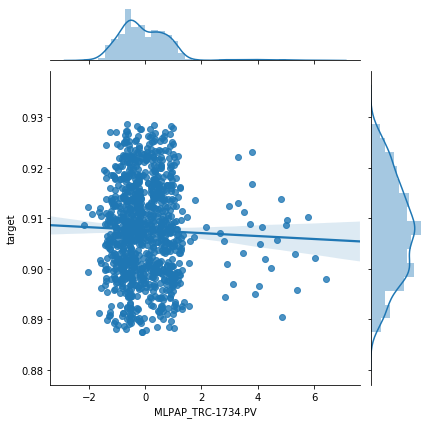

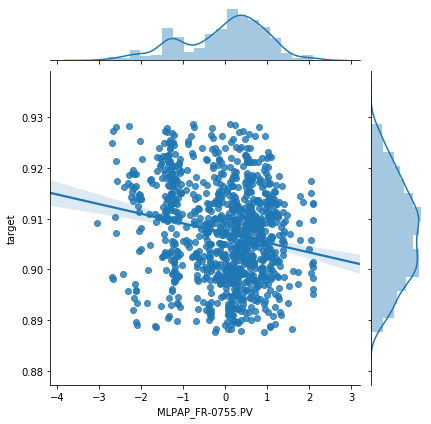

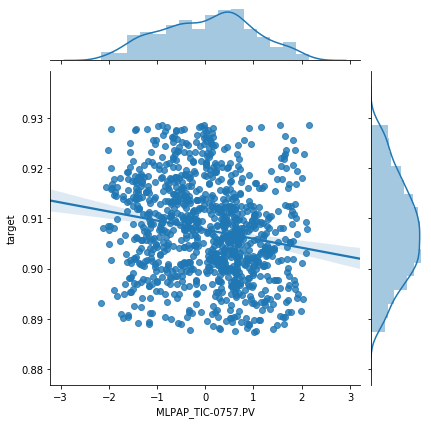

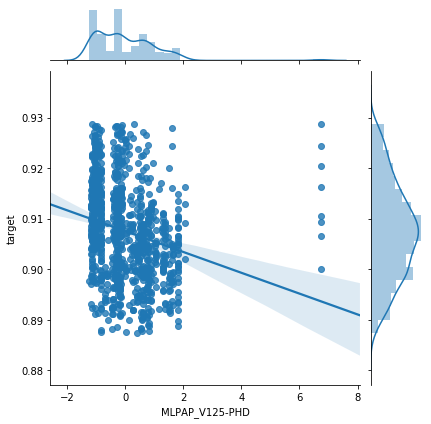

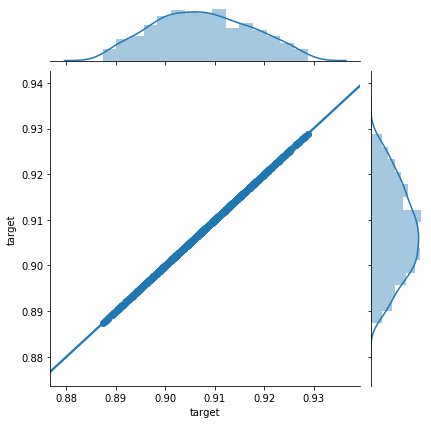

In [5]:
for i in tqdm(df.columns):
    sns.jointplot(i, "target", data=df.sample(1000), kind="reg")
    plt.show()